# 检测直线

## 霍夫变换

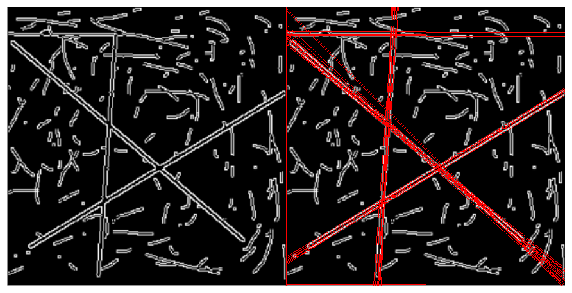

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/line.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
#open to see how to use: cv2.Canny
#http://blog.csdn.net/on2way/article/details/46851451 
edges = cv2.Canny(gray,50,200)
#hough transform
lines = cv2.HoughLines(edges,1,np.pi/180,160)
lines1 = lines[:,0,:]#提取为为二维
result = img.copy()
for rho,theta in lines1[:]: 
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a)) 
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)

result = np.hstack([img, result])
plt.figure(figsize=(10, 8))
plt.imshow(result), plt.axis("off")
plt.show()

## 霍夫概率变换

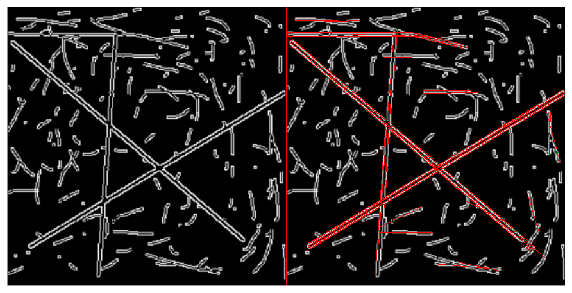

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/line.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
#open to see how to use: cv2.Canny
#http://blog.csdn.net/on2way/article/details/46851451 
edges = cv2.Canny(gray,50,200)
#hough transform
lines = cv2.HoughLinesP(edges,1,np.pi/180,30,minLineLength=60,maxLineGap=10)
lines1 = lines[:,0,:]#提取为二维
result = img.copy()
for x1,y1,x2,y2 in lines1[:]: 
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)

result = np.hstack([img, result])
plt.figure(figsize=(10, 8))
plt.imshow(result), plt.axis("off")
plt.show()

# 检测圆

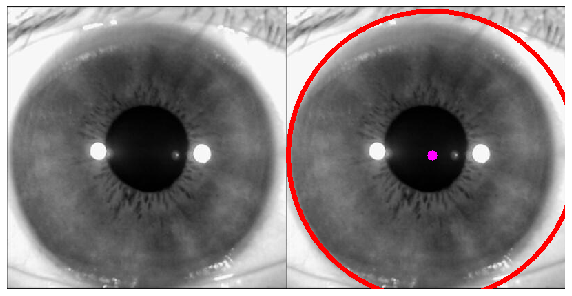

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/hichens/Desktop/CV_code/images/eye_ball.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 

#hough transform
circles1 = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1, 100,param1=100,param2=30,minRadius=200,maxRadius=280)
circles = circles1[0,:,:]#提取为二维
circles = np.uint16(np.around(circles))#四舍五入，取整
result = img.copy()
for i in circles[:]: 
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),5)#画圆
    cv2.circle(img,(i[0],i[1]),2,(255,0,255),10)#画圆心

    
result = np.hstack([result, img ])
plt.figure(figsize=(10, 8))
plt.imshow(result), plt.axis("off")
plt.show()

# 广义霍夫变换